a) null values

b) visualisation

    1.bar plot

    2.histogram

    3.swarm

    4.line

    5.dist plot

    6.pie chart

    7.count plot(for cetegorical Data)

c) outliers

d) encoding

e) dependent n independent

f) standard scallar

g) vif (check multi coloiearity)

h) model building (multi classification algo -> logistic regression, k nearrest classifier, Decission tree, SVM, Rendom Forest, Adda Boost, Grediant Boost, xgboost Boost.) (check -> Accuracy and classification Report)

i) save the best model

Dataset = "https://github.com/dsrscientist/DSData/blob/master/HR_attrition_rate.csv"

My Predection Column is = SALARY

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#importing the z score 
from scipy.stats import zscore

In [2]:
# import the HR_attrition_rate csv Data-Set

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/HR_attrition_rate.csv")

In [3]:
# Printing the first 5 Data of the dataset

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Printing the description of the dataset

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Printing the shape (number or rows and columns) of the dataset

df.shape

(14999, 10)

In [6]:
# Printing the value count of salary columns

df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
# Printing the value count of Departments columns

df['Departments '].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

Checking the Data-Type of the columns

In [8]:
df['Departments '].dtypes

dtype('O')

In [9]:
df['salary'].dtypes

dtype('O')

In [10]:
# Printing the columns name

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

Checking the Null Values in the Data-Set

In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

Valla There is no null values in the Data-Set

Creating the Heat Plot

<AxesSubplot:>

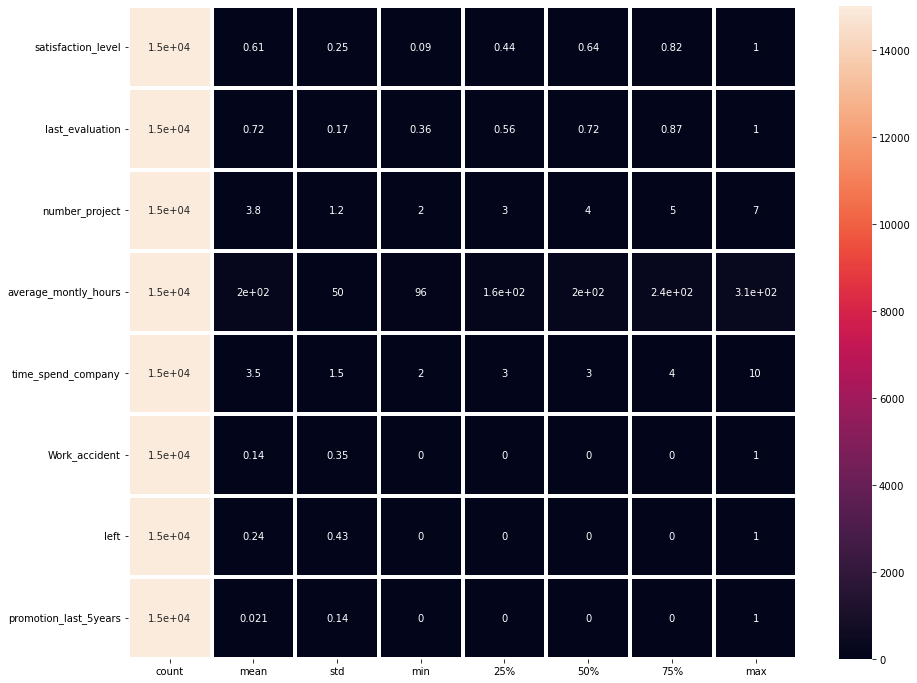

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df.describe().T,annot=True,linecolor='white',linewidths=4)

Spliting the Dependent and Independent Columns of the Data-Set

X = Dependent Variable

y = Independent Variable

In [13]:
cat_var = df.select_dtypes(include=['O'])
cat_var

,Departments,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [14]:
num_var = df.select_dtypes(include=['int'])
num_var

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,2,157,3,0,1,0
1,5,262,6,0,1,0
2,7,272,4,0,1,0
3,5,223,5,0,1,0
4,2,159,3,0,1,0
...,...,...,...,...,...,...
14994,2,151,3,0,1,0
14995,2,160,3,0,1,0
14996,2,143,3,0,1,0
14997,6,280,4,0,1,0


Polting the Graph of Categorical Columns

Bar Plot

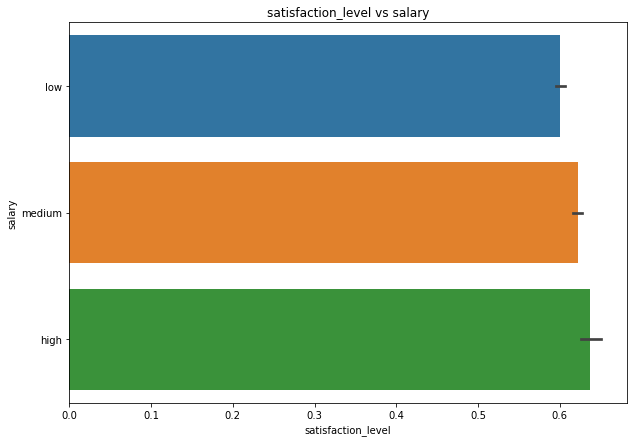

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(df['satisfaction_level'],df['salary'])
plt.title('satisfaction_level vs salary')
plt.xlabel('satisfaction_level')
plt.ylabel('salary')
plt.show()

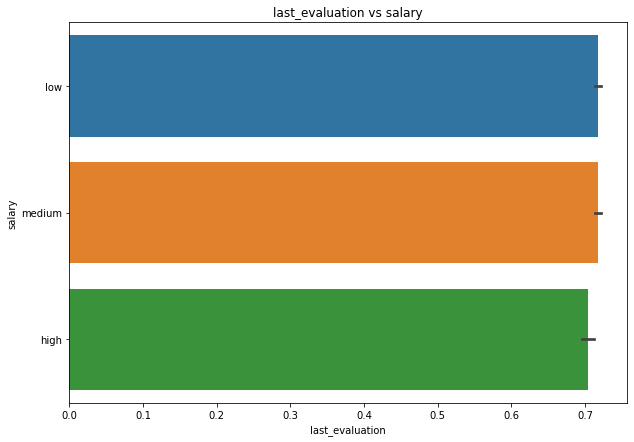

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(df['last_evaluation'],df['salary'])
plt.title('last_evaluation vs salary')
plt.xlabel('last_evaluation')
plt.ylabel('salary')
plt.show()

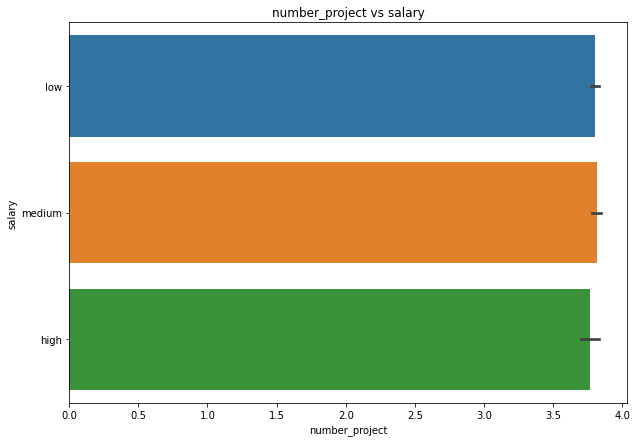

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(df['number_project'],df['salary'])
plt.title('number_project vs salary')
plt.xlabel('number_project')
plt.ylabel('salary')
plt.show()

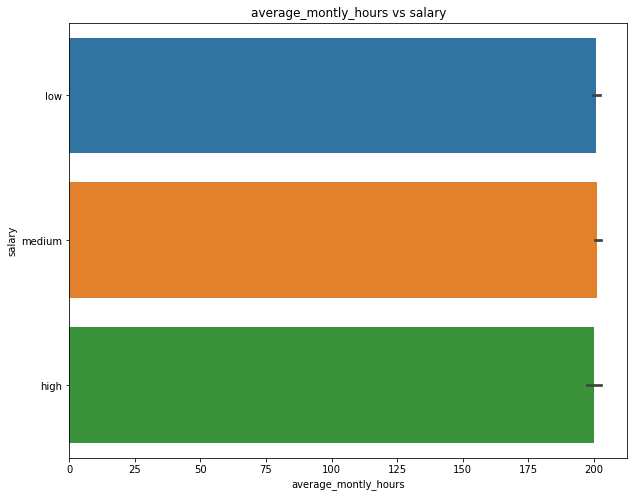

In [18]:
plt.figure(figsize=(10, 8))
sns.barplot(df['average_montly_hours'], df['salary'])
plt.title('average_montly_hours vs salary')
plt.xlabel('average_montly_hours')
plt.ylabel('salary')
plt.show()

Text(0, 0.5, 'salary')

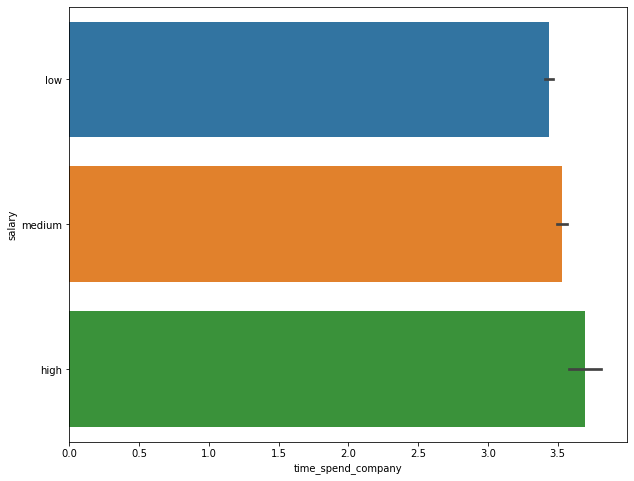

In [19]:
plt.figure(figsize= (10, 8))
sns.barplot(df['time_spend_company'], df['salary'])
plt.xlabel('time_spend_company vs salary')
plt.xlabel('time_spend_company')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

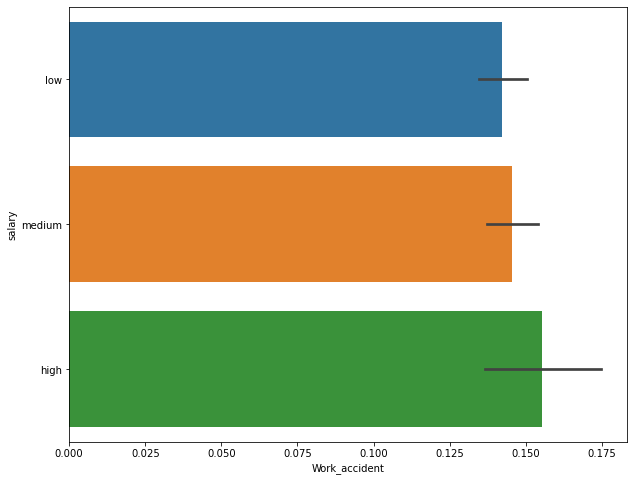

In [20]:
plt.figure(figsize= (10, 8))
sns.barplot(df['Work_accident'], df['salary'])
plt.xlabel('Work_accident vs salary')
plt.xlabel('Work_accident')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

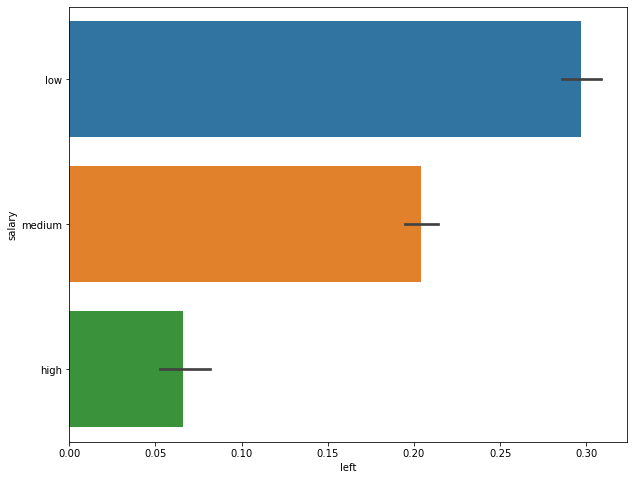

In [21]:
plt.figure(figsize= (10, 8))
sns.barplot(df['left'], df['salary'])
plt.xlabel('left vs salary')
plt.xlabel('left')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

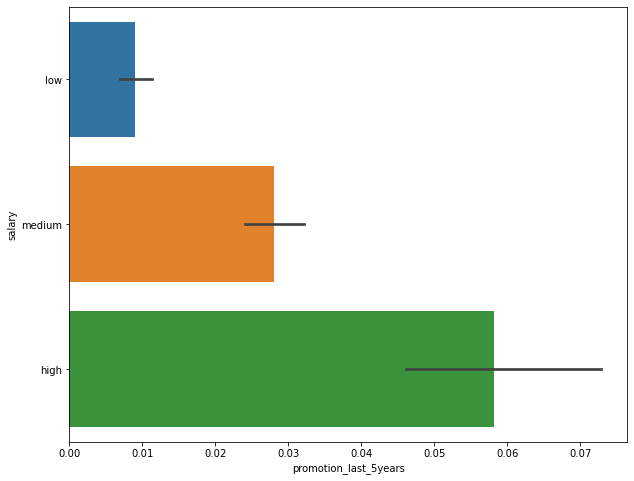

In [22]:
plt.figure(figsize= (10, 8))
sns.barplot(df['promotion_last_5years'], df['salary'])
plt.xlabel('promotion_last_5years vs salary')
plt.xlabel('promotion_last_5years')
plt.ylabel('salary')

histogram

In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'satisfaction_level'}>]],
      dtype=object)

<Figure size 720x504 with 0 Axes>

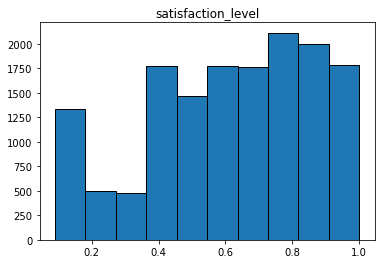

In [24]:
plt.figure(figsize=(10,7))
df.hist(column='satisfaction_level',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'satisfaction_level'}>]],
      dtype=object)

<Figure size 720x504 with 0 Axes>

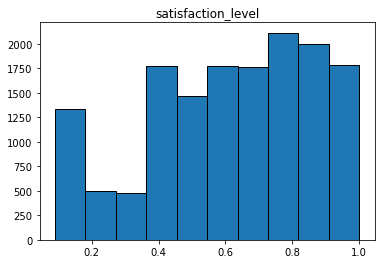

In [25]:
plt.figure(figsize=(10,7))
df.hist(column='satisfaction_level',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'number_project'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

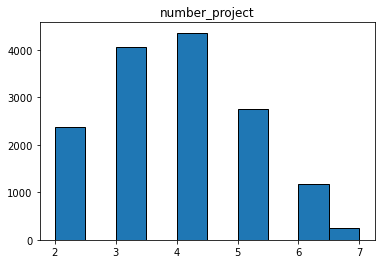

In [26]:
plt.figure(figsize=(10,7))
df.hist(column='number_project',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'average_montly_hours'}>]],
      dtype=object)

<Figure size 720x504 with 0 Axes>

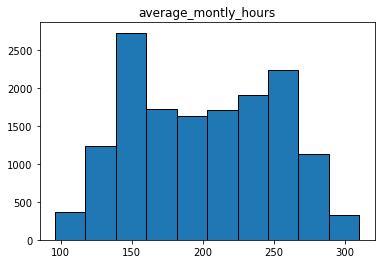

In [27]:
plt.figure(figsize=(10,7))
df.hist(column='average_montly_hours',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'time_spend_company'}>]],
      dtype=object)

<Figure size 720x504 with 0 Axes>

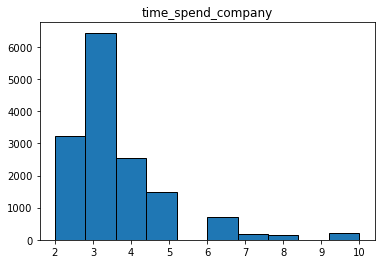

In [28]:
plt.figure(figsize=(10,7))
df.hist(column='time_spend_company',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Work_accident'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

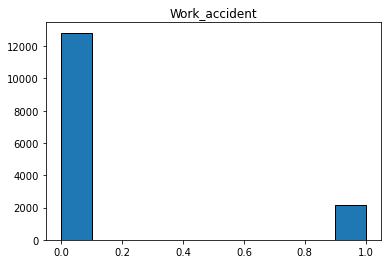

In [29]:
plt.figure(figsize=(10,7))
df.hist(column='Work_accident',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'left'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

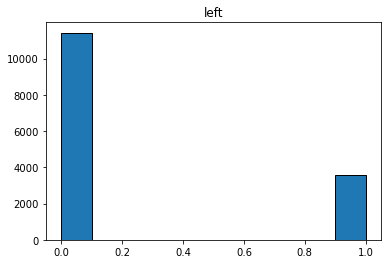

In [30]:
plt.figure(figsize=(10,7))
df.hist(column='left',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'promotion_last_5years'}>]],
      dtype=object)

<Figure size 720x504 with 0 Axes>

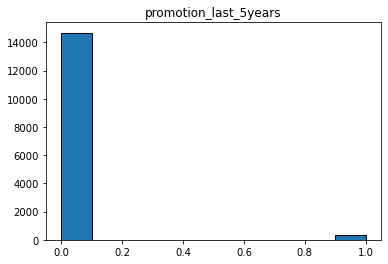

In [31]:
plt.figure(figsize=(10,7))
df.hist(column='promotion_last_5years',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'number_project'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

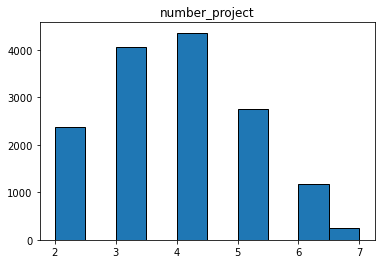

In [32]:
plt.figure(figsize=(10,7))
df.hist(column='number_project',grid=False,edgecolor='black')

In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

line

<AxesSubplot:xlabel='satisfaction_level', ylabel='salary'>

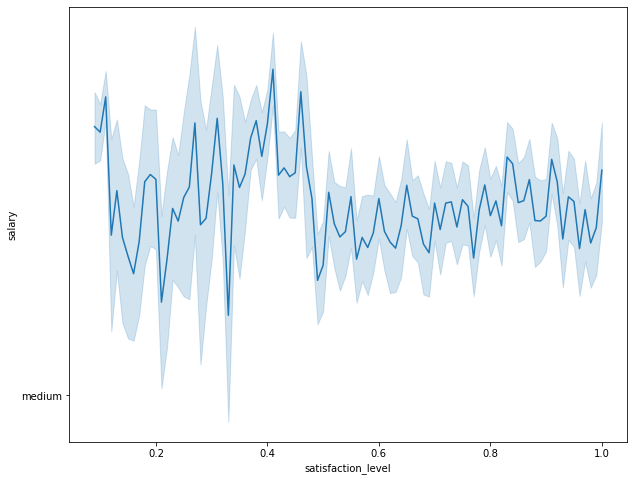

In [34]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="satisfaction_level", y="salary")

<AxesSubplot:xlabel='last_evaluation', ylabel='salary'>

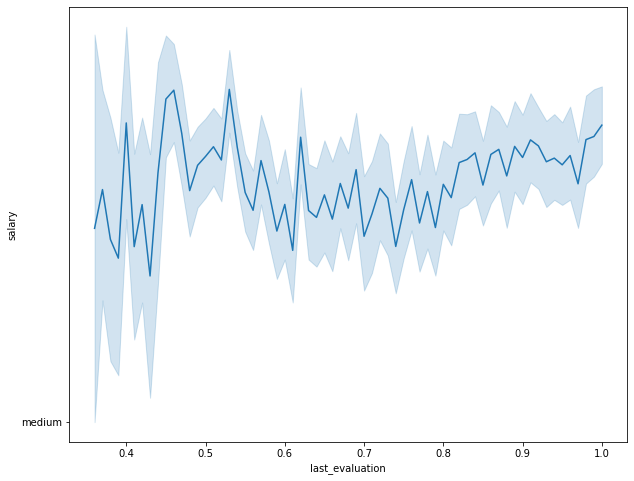

In [35]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="last_evaluation", y="salary")

<AxesSubplot:xlabel='number_project', ylabel='salary'>

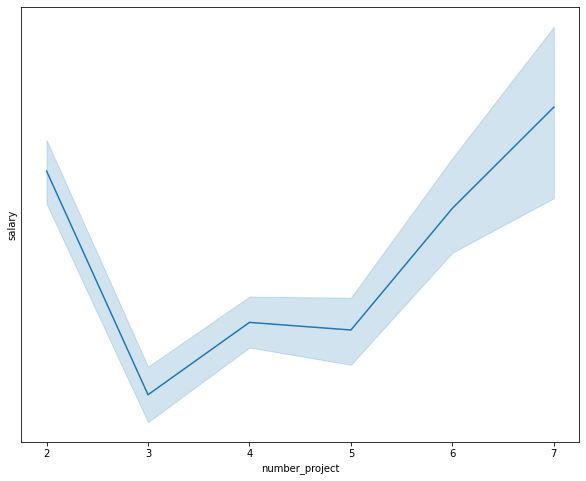

In [36]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="number_project", y="salary")

<AxesSubplot:xlabel='average_montly_hours', ylabel='salary'>

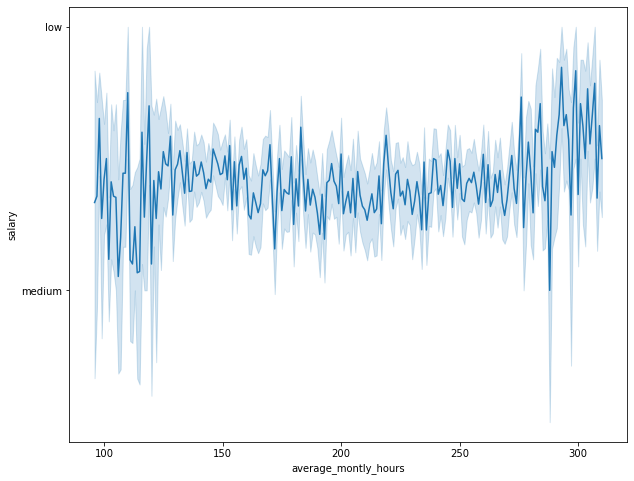

In [37]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="average_montly_hours", y="salary")

<AxesSubplot:xlabel='time_spend_company', ylabel='salary'>

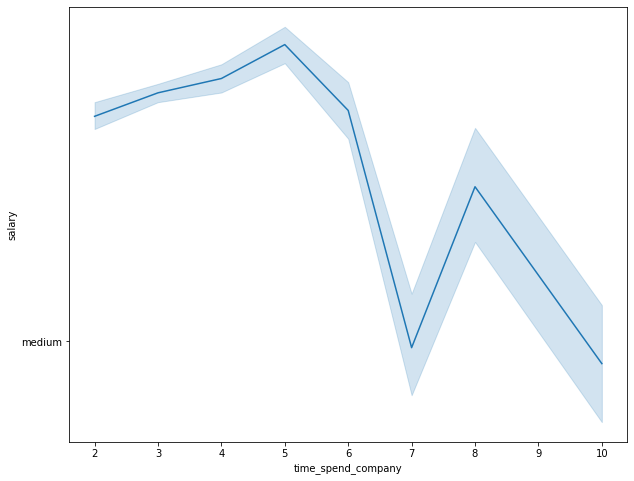

In [38]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="time_spend_company", y="salary")

<AxesSubplot:xlabel='Work_accident', ylabel='salary'>

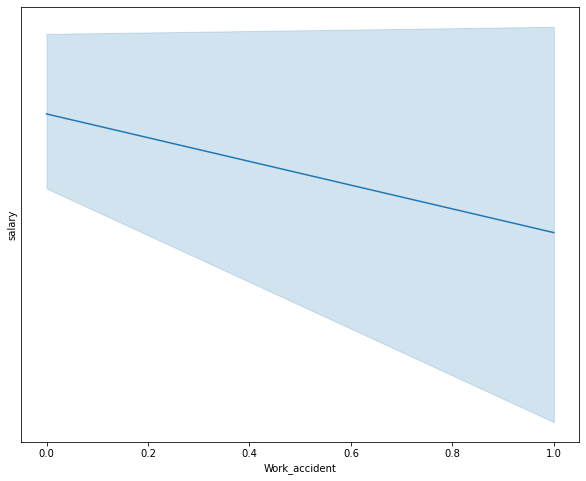

In [39]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="Work_accident", y="salary")

<AxesSubplot:xlabel='left', ylabel='salary'>

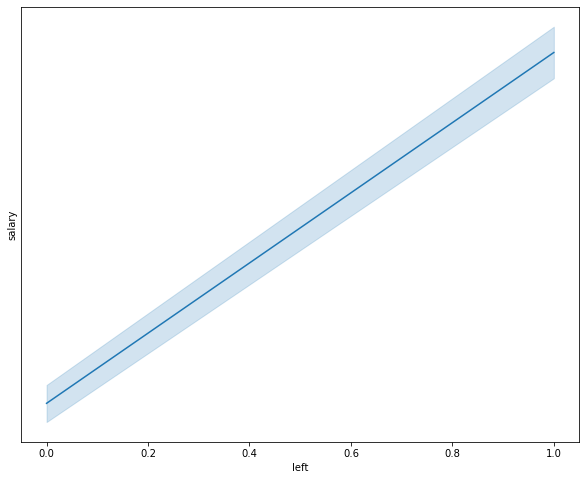

In [40]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="left", y="salary")

<AxesSubplot:xlabel='promotion_last_5years', ylabel='salary'>

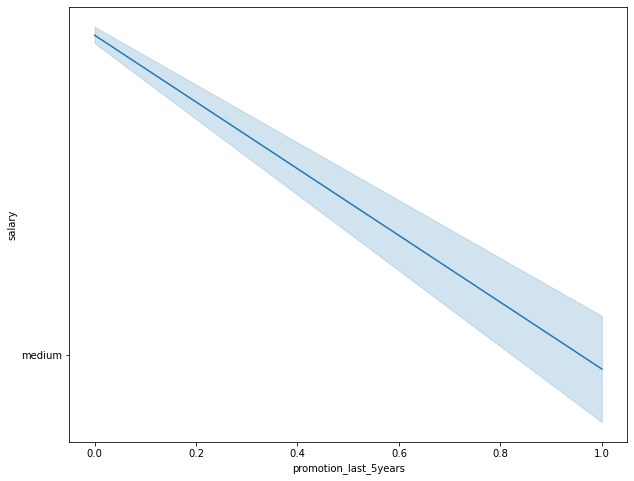

In [41]:
plt.figure(figsize = (10, 8))
sns.lineplot(data=df, x="promotion_last_5years", y="salary")

In [42]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

dist plot

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

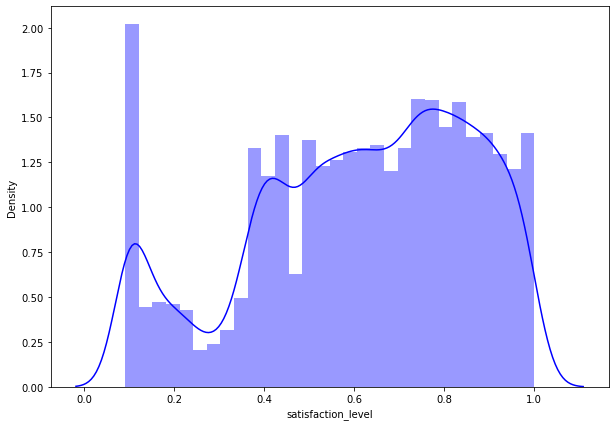

In [43]:
plt.figure(figsize=(10,7))
sns.distplot(df['satisfaction_level'],color='blue')

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

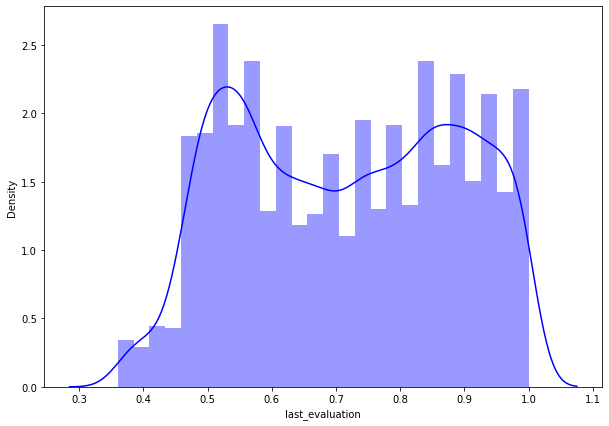

In [44]:
plt.figure(figsize=(10,7))
sns.distplot(df['last_evaluation'],color='blue')

<AxesSubplot:xlabel='number_project', ylabel='Density'>

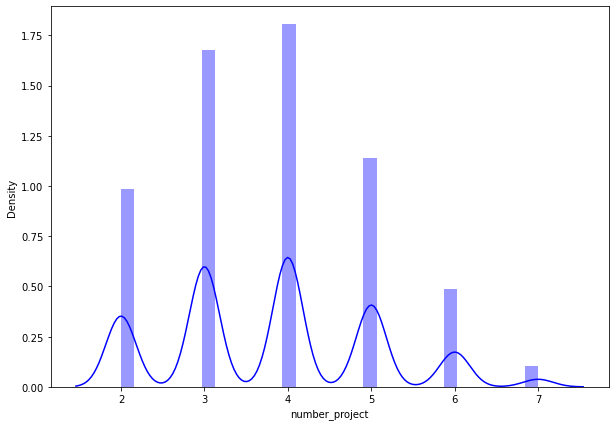

In [45]:
plt.figure(figsize=(10,7))
sns.distplot(df['number_project'],color='blue')

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

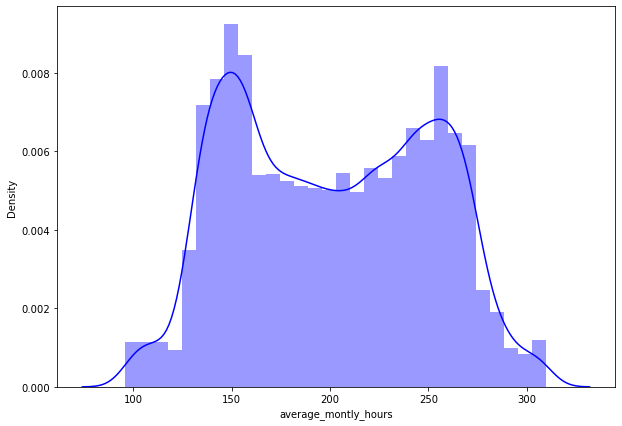

In [46]:
plt.figure(figsize=(10,7))
sns.distplot(df['average_montly_hours'],color='blue')

<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

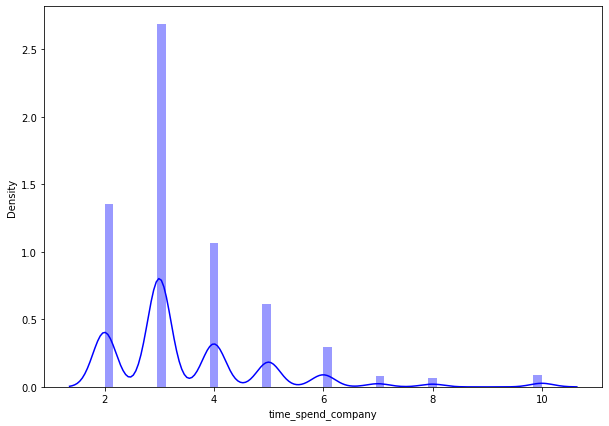

In [47]:
plt.figure(figsize=(10,7))
sns.distplot(df['time_spend_company'],color='blue')

<AxesSubplot:xlabel='Work_accident', ylabel='Density'>

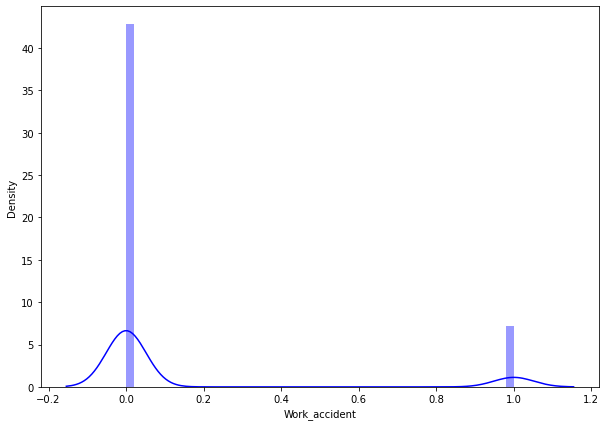

In [48]:
plt.figure(figsize=(10,7))
sns.distplot(df['Work_accident'],color='blue')

<AxesSubplot:xlabel='left', ylabel='Density'>

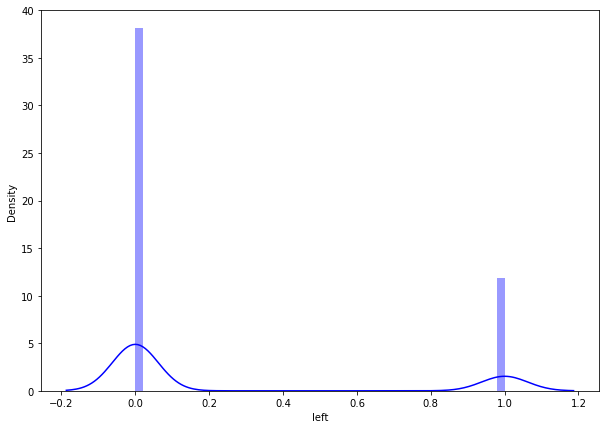

In [49]:
plt.figure(figsize=(10,7))
sns.distplot(df['left'],color='blue')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='Density'>

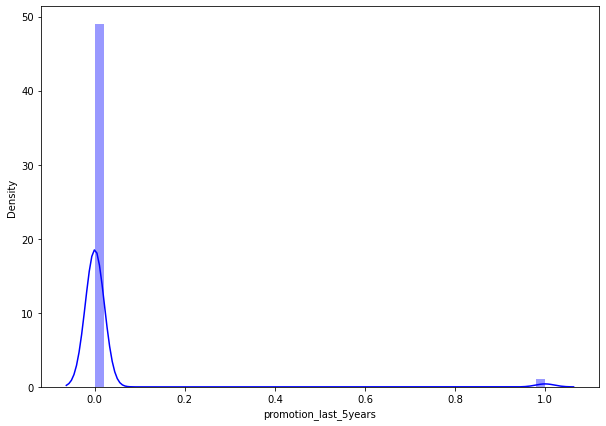

In [50]:
plt.figure(figsize=(10,7))
sns.distplot(df['promotion_last_5years'],color='blue')

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

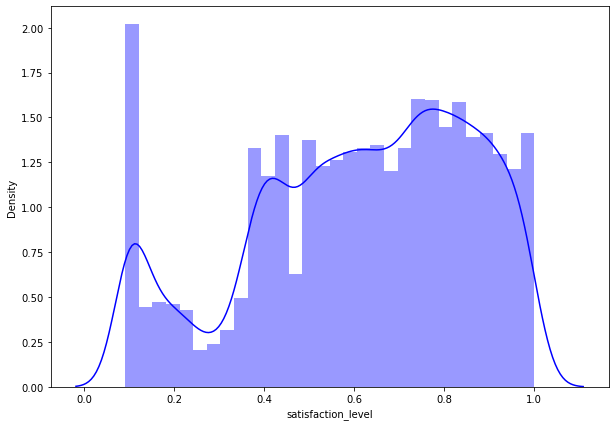

In [51]:
plt.figure(figsize=(10,7))
sns.distplot(df['satisfaction_level'],color='blue')

In [52]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

count-plot

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

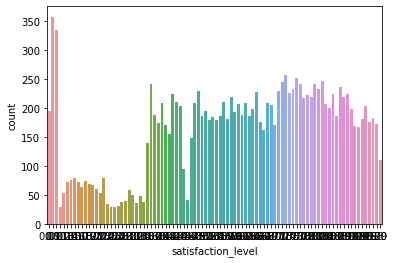

In [53]:
sns.countplot(x = 'satisfaction_level', data = df)

<AxesSubplot:xlabel='last_evaluation', ylabel='count'>

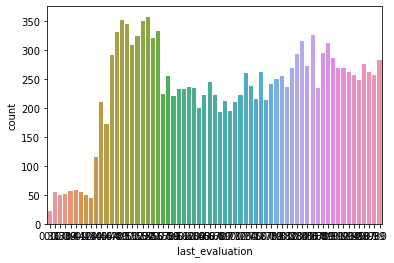

In [54]:
sns.countplot(x = 'last_evaluation', data = df)

<AxesSubplot:xlabel='number_project', ylabel='count'>

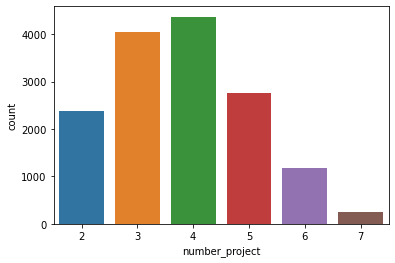

In [55]:
sns.countplot(x = 'number_project', data = df)

<AxesSubplot:xlabel='average_montly_hours', ylabel='count'>

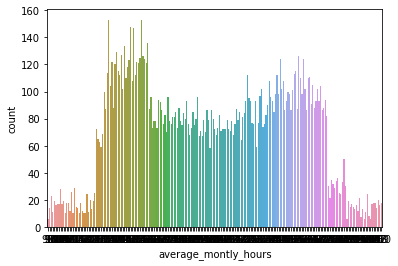

In [56]:
sns.countplot(x = 'average_montly_hours', data = df)

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

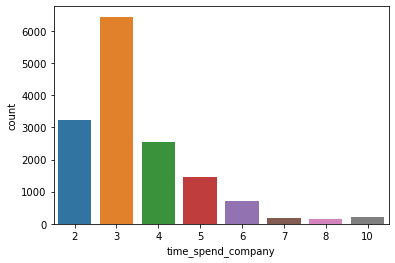

In [57]:
sns.countplot(x = 'time_spend_company', data = df)

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

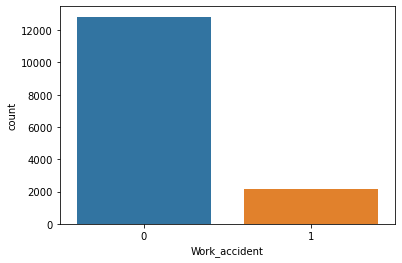

In [58]:
sns.countplot(x = 'Work_accident', data = df)

<AxesSubplot:xlabel='left', ylabel='count'>

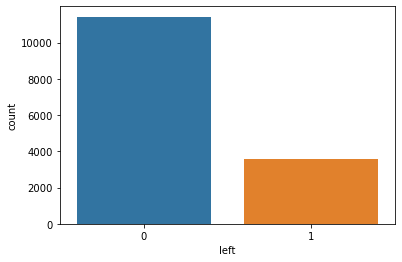

In [59]:
sns.countplot(x = 'left', data = df)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

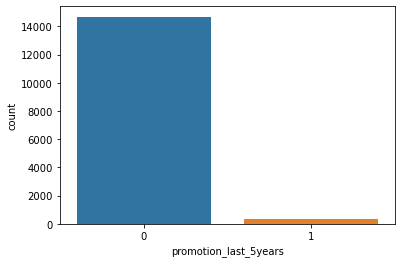

In [60]:
sns.countplot(x = 'promotion_last_5years', data = df)

<AxesSubplot:xlabel='Departments ', ylabel='count'>

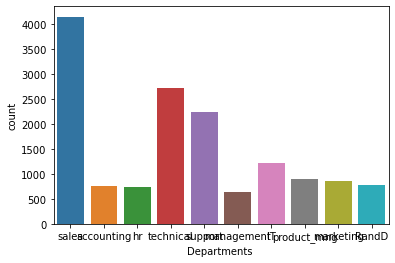

In [61]:
sns.countplot(x = 'Departments ', data = df)

<AxesSubplot:xlabel='salary', ylabel='count'>

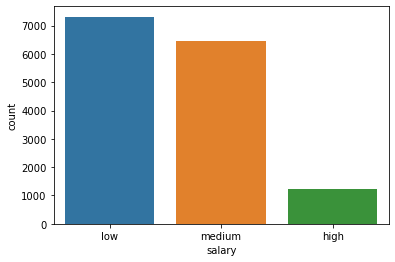

In [62]:
sns.countplot(x = 'salary', data = df)

In [63]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

boxplot

<AxesSubplot:xlabel='satisfaction_level'>

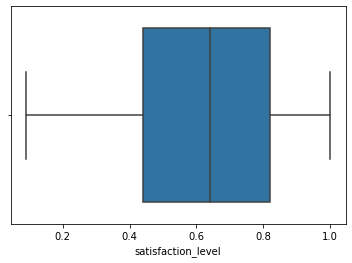

In [64]:
sns.boxplot(x=df["satisfaction_level"])

<AxesSubplot:xlabel='last_evaluation'>

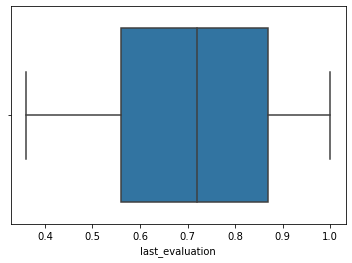

In [65]:
sns.boxplot(x=df["last_evaluation"])

<AxesSubplot:xlabel='number_project'>

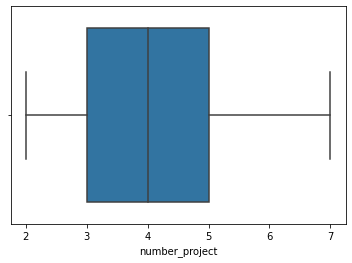

In [66]:
sns.boxplot(x=df["number_project"])

<AxesSubplot:xlabel='average_montly_hours'>

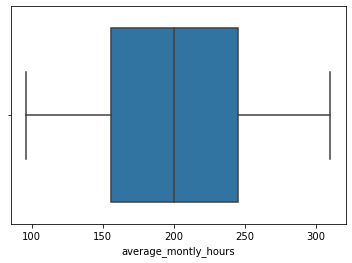

In [67]:
sns.boxplot(x=df["average_montly_hours"])

<AxesSubplot:xlabel='time_spend_company'>

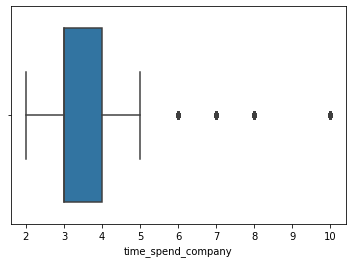

In [68]:
sns.boxplot(x=df["time_spend_company"])

<AxesSubplot:xlabel='Work_accident'>

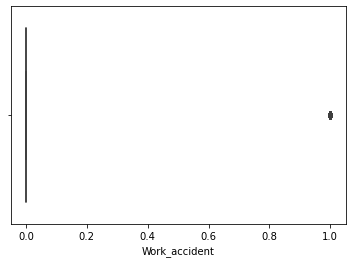

In [69]:
sns.boxplot(x=df["Work_accident"])

<AxesSubplot:xlabel='left'>

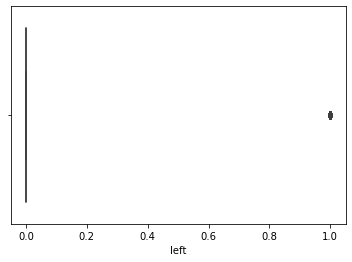

In [70]:
sns.boxplot(x=df["left"])

In [71]:
# checking the quartile
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)

In [72]:
Q1

3.0

In [73]:
Q3

4.0

In [74]:
q1 = df['Work_accident'].quantile(0.25)
q3 = df['Work_accident'].quantile(0.75)

In [75]:
q1

0.0

In [76]:
q3

0.0

In [77]:
iqr = q3-q1

In [78]:
iqr

0.0

In [79]:
df.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [80]:
q_q1 = df['left'].quantile(0.25)
q_q3 = df['left'].quantile(0.75)

In [81]:
q_q1

0.0

In [82]:
q_q3

0.0

In [83]:
lower_range = Q1-(1.5* iqr)

In [84]:
lower_range

3.0

In [85]:
# removing the outliers using z-score
mean = np.mean(df['time_spend_company'])
std = np.std(df['time_spend_company'])
print((df['time_spend_company']-mean)/std)

0       -0.341235
1        1.713436
2        0.343655
3        1.028546
4       -0.341235
           ...   
14994   -0.341235
14995   -0.341235
14996   -0.341235
14997    0.343655
14998   -0.341235
Name: time_spend_company, Length: 14999, dtype: float64


In [86]:
df['time_spend_company'] = (df['time_spend_company'] - mean)/std
print(df.head(5))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0           -0.341235              0     1                      0   
1            1.713436              0     1                      0   
2            0.343655              0     1                      0   
3            1.028546              0     1                      0   
4           -0.341235              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

In [87]:
# create empty list
outlier_indexes = []

# add index numbers of outliers to list
outlier_indexes.extend(df.index[df['time_spend_company']>3].tolist())
outlier_indexes.extend(df.index[df['time_spend_company']<-3].tolist())

print(outlier_indexes)

[11007, 11008, 11009, 11010, 11011, 11078, 11079, 11080, 11081, 11082, 11083, 11124, 11125, 11126, 11127, 11128, 11129, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11214, 11215, 11216, 11217, 11218, 11226, 11227, 11229, 11230, 11231, 11232, 11258, 11259, 11260, 11261, 11262, 11263, 11264, 11279, 11280, 11281, 11282, 11283, 11291, 11292, 11294, 11295, 11296, 11297, 11346, 11347, 11348, 11349, 11350, 11351, 11505, 11506, 11507, 11508, 11509, 11511, 11512, 11513, 11514, 11515, 11516, 11519, 11520, 11526, 11527, 11528, 11529, 11530, 11531, 11557, 11558, 11559, 11560, 11561, 11563, 11564, 11565, 11566, 11567, 11568, 11571, 11572, 11578, 11579, 11580, 11581, 11582, 11583, 11605, 11606, 11607, 11608, 11609, 11611, 11612, 11613, 11614, 11615, 11616, 11619, 11620, 11626, 11627, 11628, 11629, 11630, 11631, 11633, 11634, 11635, 11636, 11637, 11638, 11660, 11661, 11662, 11663, 11664, 11666, 11667, 11668, 11669, 11670, 11671, 11674, 11675, 11681, 11682, 11683, 11684, 11685, 11686, 11739, 11740

In [88]:
df1 = df.drop(df.index[outlier_indexes])

In [89]:
print(df.shape[0], df1.shape[0])

14999 14623


In [90]:
df1.shape

(14623, 10)

Label Encoding for categorical to numerical

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

<AxesSubplot:xlabel='time_spend_company'>

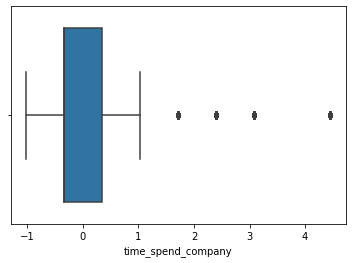

In [92]:
# Box plot
sns.boxplot(x=df["time_spend_company"])

In [93]:
for i in cat_var:
    df1[i] = le.fit_transform(df1[i])
    df1[i]

In [94]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company       float64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments                int32
salary                     int32
dtype: object

In [95]:

df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,-0.341235,0,1,0,7,1
1,0.80,0.86,5,262,1.713436,0,1,0,7,2
2,0.11,0.88,7,272,0.343655,0,1,0,7,2
3,0.72,0.87,5,223,1.028546,0,1,0,7,1
4,0.37,0.52,2,159,-0.341235,0,1,0,7,1


Spliting the Dependent and Independent Columns of the Data-Set

X = Dependent Variable

y = Independent Variable

In [96]:
X = df1.iloc[: , :-1 ]

In [97]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments
0,0.38,0.53,2,157,-0.341235,0,1,0,7
1,0.80,0.86,5,262,1.713436,0,1,0,7
2,0.11,0.88,7,272,0.343655,0,1,0,7
3,0.72,0.87,5,223,1.028546,0,1,0,7
4,0.37,0.52,2,159,-0.341235,0,1,0,7
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,-0.341235,0,1,0,8
14995,0.37,0.48,2,160,-0.341235,0,1,0,8
14996,0.37,0.53,2,143,-0.341235,0,1,0,8
14997,0.11,0.96,6,280,0.343655,0,1,0,8


In [ ]:
y = df1.iloc[: , :9 ]

In [ ]:
y

In [100]:
df1.skew()

satisfaction_level      -0.474455
last_evaluation         -0.023426
number_project           0.332829
average_montly_hours     0.053789
time_spend_company       0.961403
Work_accident            2.052671
left                     1.190937
promotion_last_5years    6.851126
Departments             -0.842032
salary                  -0.406890
dtype: float64

In [112]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

Balancing the Imbalance Dataset

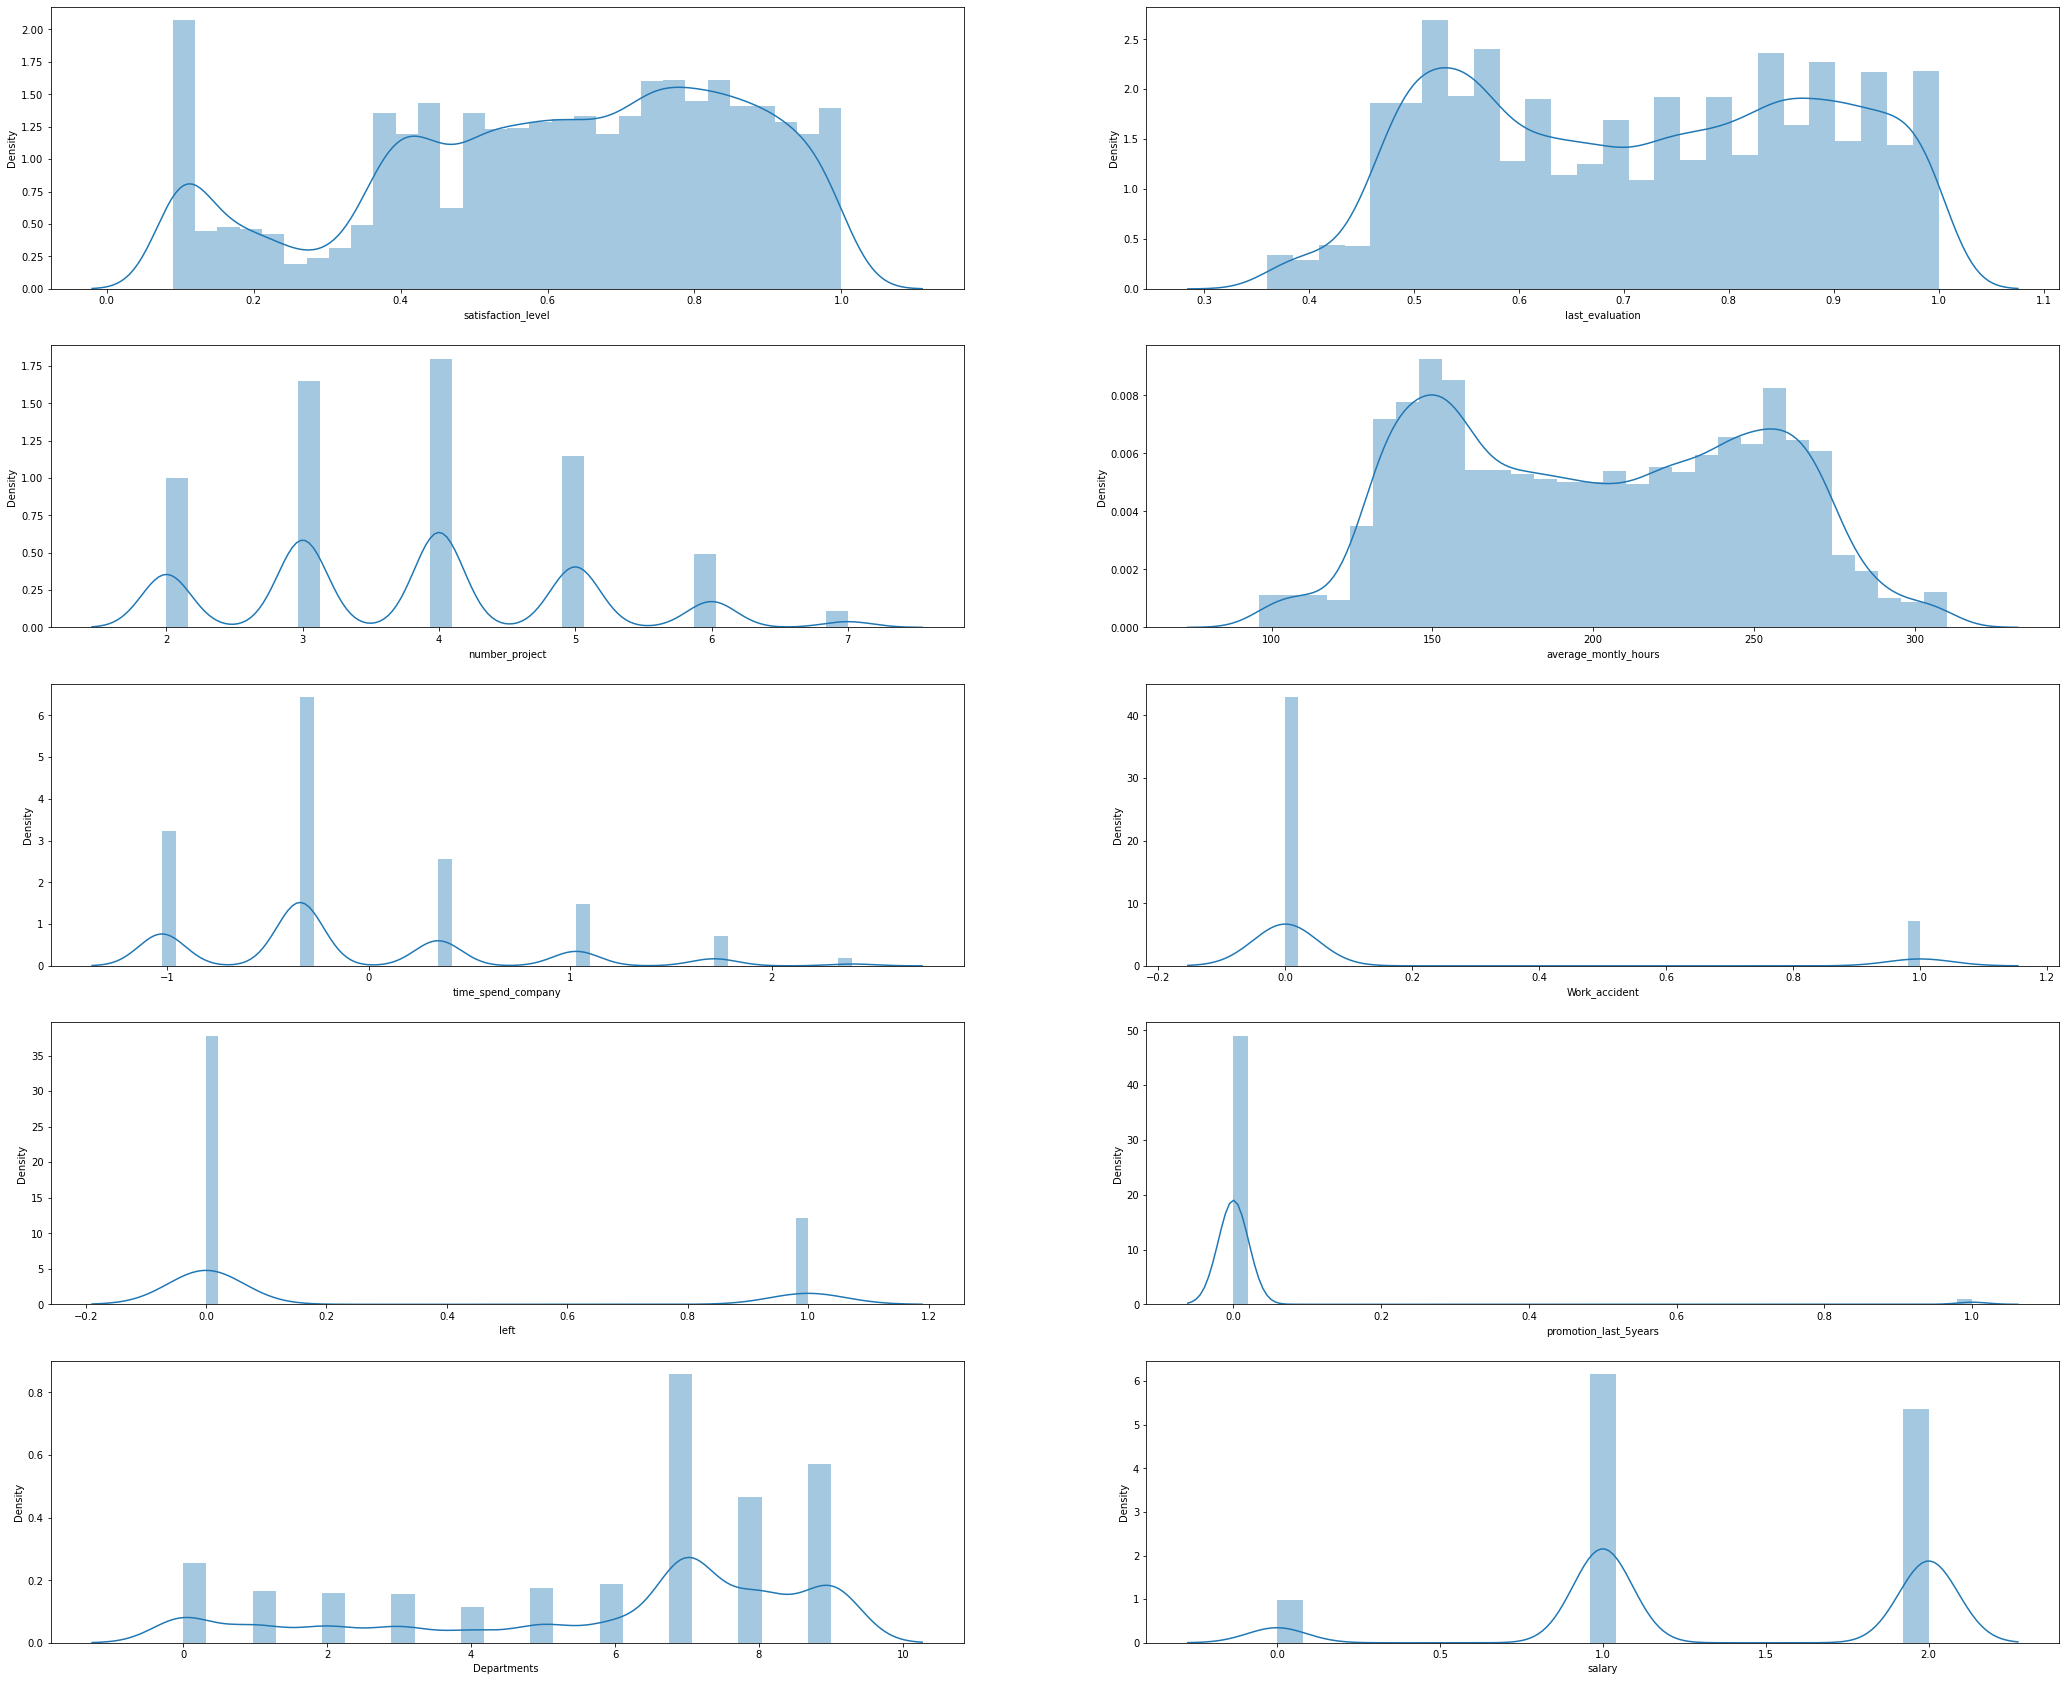

(14623, 10)


In [101]:
# Ploting the dist plot with whlde dataset 

plt.figure(figsize=(36,55))
plot = 1
for i in df1:
    if plot < 18:
        ax = plt.subplot(9,2,plot)
        sns.distplot(df1[i])
    plot += 1
plt.show()

print(df1.shape)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scalar = StandardScaler()

In [104]:
X_scaled = scalar.fit_transform(X)

In [105]:
X_scaled

array([[-0.92907682, -1.08443148, -1.45740636, ...,  1.75924171,
        -0.14299166,  0.38787651],
       [ 0.75553716,  0.84036519,  0.9647394 , ...,  1.75924171,
        -0.14299166,  0.38787651],
       [-2.01204294,  0.95701954,  2.57950324, ...,  1.75924171,
        -0.14299166,  0.38787651],
       ...,
       [-0.96918667, -1.08443148, -1.45740636, ...,  1.75924171,
        -0.14299166,  0.73556965],
       [-2.01204294,  1.42363691,  1.77212132, ...,  1.75924171,
        -0.14299166,  0.73556965],
       [-0.96918667, -1.14275865, -1.45740636, ...,  1.75924171,
        -0.14299166,  0.73556965]])

Model Building

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

In [107]:
X_scaled.shape

(14623, 9)

In [108]:
y.shape

(14623,)

Logistic - Regression

In [109]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    accuracy = accuracy_score(y_test, y_lr)
        
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score of Logistic Regression is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score of Logistic Regression is 0.5201732391155687  on Random State 77


DecisionTreeClassifier

In [110]:
maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_dt)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxRandomState = i
    
print("Best accuracy score Decission Tree is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score Decission Tree is 0.5997264645543652  on Random State 1


KNeighborsClassifier

In [111]:
maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = i)
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_knn)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxAccuracy = i
print("Best accuracy score KNeighborsClassifier is", maxAccuracy ," on Random State", maxRandomState)   

Best accuracy score KNeighborsClassifier is 1  on Random State 0


RandomForestClassifier

maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_rf)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxAccuracy = i
print("Best accuracy score Random Forest is", maxAccuracy ," on Random State", maxRandomState) 

###  K neareast
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

SVC

maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = i)
    svc = SVC()
    svc.fit(x_train, y_train)
    y_svc = svc.predict(x_test)
    accuracy = accuracy_score(y_test, y_svc)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxAccuracy = i
print("Best accuracy score SVC is", maxAccuracy ," on Random State", maxRandomState) 

GradientBoostingClassifier

maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = i)
    gbc = GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    y_gbc = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, y_gbc)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxAccuracy = i
print("Best accuracy score Gradient Boost Classifier is", maxAccuracy ," on Random State", maxRandomState) 

AdaBoostClassifier

maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = i)
    abc = AdaBoostClassifier()
    abc.fit(x_train, y_train)
    y_abc = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, y_abc)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxAccuracy = i
print("Best accuracy score AdaBoost Classifier is", maxAccuracy ," on Random State", maxRandomState)

xgboost

maxAccuracy = 0
maxRandomState = 0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = i)
    xgbt = xgb.XGBClassifier()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    accuracy = accuracy_score(y_test, y_xgbt)
    
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxAccuracy = i
print("Best accuracy score Xgboost is", maxAccuracy ," on Random State", maxRandomState)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)
xgbt = xgb.XGBClassifier()
xgbt.fit(x_train, y_train)
y_xgbt = xgbt.predict(x_test)
accuracy_xgbt = accuracy_score(y_test, y_xgbt)

accuracy_xgbt

print(classification_report(y_test,y_xgbt))